In [363]:
import pandas as pd 
import numpy as np
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler  

In [364]:
data=pd.read_csv('US Presidential Data.csv')

In [365]:
data.head()

,Win/Loss,Optimism,Pessimism,PastUsed,FutureUsed,PresentUsed,OwnPartyCount,OppPartyCount,NumericContent,Extra,Emoti,Agree,Consc,Openn
0,1,0.104505,0.050450,0.438144,0.494845,0.067010,2,2,0.001878,4.041,4.049,3.469,2.450,2.548
1,1,0.114575,0.059236,0.291262,0.621359,0.087379,1,4,0.001419,3.446,3.633,3.528,2.402,2.831
2,1,0.112572,0.049302,0.415966,0.516807,0.067227,1,1,0.002131,3.463,4.039,3.284,2.159,2.465
3,1,0.107234,0.046320,0.463492,0.466667,0.069841,1,3,0.001872,4.195,4.661,4.007,2.801,3.067
4,1,0.105826,0.051724,0.334262,0.582173,0.083565,3,4,0.002229,4.658,4.023,3.283,2.415,2.836


In [366]:
# create training and testing vars
x=data.drop('Win/Loss',axis=1)
y=data['Win/Loss']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

train_set=(X_train,y_train)
test_set=(X_test,y_test)

print(X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)



(1219, 13) (1219,)
(305, 13) (305,)


In [367]:
scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)  

In [368]:
from sklearn.neighbors import KNeighborsClassifier  

#knn1
classifier = KNeighborsClassifier(n_neighbors=1)  
classifier.fit(X_train, y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [369]:
y_pred = classifier.predict(X_test)  

In [370]:
c_error=(((y_pred - y_test) ** 2).sum()) / len(y_pred)
print('Classification Error:',c_error)
print('Confusion Matrix:\n',confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred)) 
classifier.score(X_test,y_test)

Classification Error: 0.25245901639344265
Confusion Matrix:
 [[ 81  42]
 [ 35 147]]
             precision    recall  f1-score   support

          0       0.70      0.66      0.68       123
          1       0.78      0.81      0.79       182

avg / total       0.75      0.75      0.75       305



0.7475409836065574

In [371]:
#run 100 times and see thr error

error=[]

#error claculation
for i in range(1,100):
    # create training and testing vars
    y=data['Win/Loss']
    X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2)


    scaler = StandardScaler()  
    scaler.fit(X_train)

    X_train = scaler.transform(X_train)  
    X_test = scaler.transform(X_test) 

    classifier = KNeighborsClassifier(n_neighbors=1)  
    classifier.fit(X_train, y_train) 
    y_pred = classifier.predict(X_test) 
    error.append(np.mean(y_pred != y_test))
    
print('Error on 100 iteration:\n')
error

Error on 100 iteration:



[0.006557377049180328,
 0.013114754098360656,
 0.019672131147540985,
 0.013114754098360656,
 0.01639344262295082,
 0.009836065573770493,
 0.013114754098360656,
 0.006557377049180328,
 0.009836065573770493,
 0.009836065573770493,
 0.006557377049180328,
 0.01639344262295082,
 0.009836065573770493,
 0.01639344262295082,
 0.01639344262295082,
 0.006557377049180328,
 0.009836065573770493,
 0.009836065573770493,
 0.003278688524590164,
 0.013114754098360656,
 0.009836065573770493,
 0.009836065573770493,
 0.006557377049180328,
 0.006557377049180328,
 0.013114754098360656,
 0.003278688524590164,
 0.01639344262295082,
 0.013114754098360656,
 0.029508196721311476,
 0.013114754098360656,
 0.013114754098360656,
 0.01639344262295082,
 0.01639344262295082,
 0.013114754098360656,
 0.006557377049180328,
 0.003278688524590164,
 0.02622950819672131,
 0.009836065573770493,
 0.01639344262295082,
 0.009836065573770493,
 0.009836065573770493,
 0.013114754098360656,
 0.003278688524590164,
 0.00327868852459016

In [372]:
error=[]
matrix=[]
#error claculation
for i in range(1,50):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    prediction=knn.predict(X_test)
    error.append(np.mean(prediction != y_test))
    matrix.append(classification_report(prediction,y_test))

Text(0,0.5,'Mean Error')

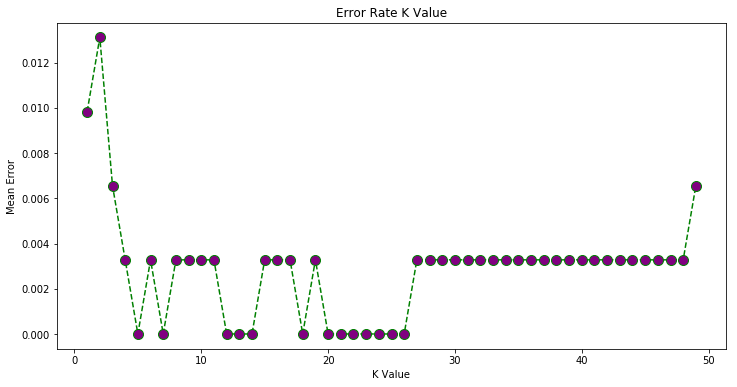

In [373]:
#plot
plt.figure(figsize=(12, 6))
plt.plot(range(1, 50), error, color='green', linestyle='dashed', marker='o',  
         markerfacecolor='purple', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error')  
